# Deep Learning Part II: Deep Learning from the Foundations

> *NOTE: The document is mostly made from notes that I typed while in the class, that's why it is messy sometimes. It is a work in progress. When watching the videos I will be continuously updating the notes.*

## Intro
- Very different part II of previous year
- We will implement fastai library from foundations (from scratch)
    - Basic matrix calculus
    - Training loops
    - Optimizers customized
    - Customized annealing
    - Actually something where you can train world class models
- Read and implement papers
- Solve applications that are not fully backed in the fastai library
- In the end, implement on Swift
- So many papers nowaday
    - and says minor variations of the same thing
- Show the foundations so that you can choose your 12 papers
- Cutting edge is really about engineer, not about papers
    - Who can bake that things in code
- Part II will be more about bottom up (with code)
- Create your own algorithm to solve the things you do.
- Today we'll implement matrix multiplication from scratch with Python

## Embracing Swift for Deep Learning
- Chris
    - Built compilers, C for Mac
    - Built the most recent language
    - Currently dedicating his life to deep learning
- Julia has pottential as well!
- S4TF Pros
    - Write everything in swift
    - See whats happening
    - opportunities
- Cons
    - Minimal Ecosystem
    - Very little works
    - Lots to learn
- PyTorch Pros
    - Get work done now
    - Great ecosystem
    - Docs and tutorials
- Cons
    - Performance
    - Pythons types
    - Mismatch with backend libs
- Swift will possibibly take place in this field

## What do we mean by from the foudations?
Recreate fastai and much of pytorch? matrix multiply, torch.nn, using:
- Python
- Python stdlib
- Non ds modules
- Pytorch array creation, RGN, indexer
- fastai.datasets
- matplotlib

## But why?
- Really experiment
- Understand it by creating it
- Correlate papers with code
- Tweak everythin
- Contribute

## There are many opportunities in this class
- Your homework will be at the cutting edge
- Few DL practictioners know what you know now
- Experiment lots, especially in your area of expertise
- Much of what you find will have not be written about before
- Don't wait to be perfect before you start communicating
    - > Write stuff down for the You of 6 months ago, that's your audience
- If you don't have a blog, try medium.com

## Recap of part I
- He assumes that you don't remember everything.
- As we go on, if necessary, you go back and watch that video
- Especially the second half
- He assumes that you know know about SGD from the scratch
- Topics
    - Convolutions
    - Weight decay
    - Dropout
    - ...

## Overfit > Reduce overfitting > There's no step 3
- Try to make sure we can train good models
- There are ~~three~~two steps for trainig a good model
1. First we try to create something with way more capacity than we need
    - No regularization
    - Overfit
2. Overfitting does not mean training loss lower than validation loss
    - A wealthy model almost always will have such behavior
    - **Overfitting is when you actually see your validation loss getting worse**
- Possible three would be visualize output
- One is easy, the two is more difficult.

## Five steps to avoid overfitting
1. More data
2. Data augmentation
3. Generalizable architectures
4. Regularization
5. Reduce archtecture complexity

- Most begginers start with 5 but that should be the last
    - Unless the model is too slow

## It's time to start reading papers
- Even familiar stuff look complex in a paper!
- Papers are important for deep learning beyond the basics, but hard to read
- Google for a blog post describing the paper
    - They are not selected for their outstanding clarity of comunication
    - Usually a blog post will do the job way better than the paper does
- Learn to produce greek letters


## List of mathematical symbols on Wikipedia
- https://en.wikipedia.org/wiki/List_of_mathematical_symbols
- or use [detexify](http://detexify.kirelabs.org/classify.html)

# In the next couple of lessons

## Steps to a basic modern CNN model
> We are going to create a pretty confident modern CNN model

- Matmul
- Relu/init
- Fully Connected foward
- Fully Connected backward
- Train loop
- Conv
- Optim
- Batch-norm
- Resnet
    - We already have this last one from Part 1

**Goal of today's class**
- Go from matrix multiplication to backward pass

## [Lesson 00.ipynb](https://github.com/fastai/fastai_docs/blob/master/dev_course/dl2/00_exports.ipynb)
- How to buld an app on jupyter notebooks
- More productive on Jupyter notebooks

### How to pull out bits of code from jupyter into a package
- Use the special comment `#export` to tell the system a cell that you want to keep and reuse.  
- Then use the file [`notebook2script.py`](https://github.com/fastai/fastai_docs/blob/master/dev_course/dl2/notebook2script.py) which goes through the program and find cells with the special comment `#export` and put them into a python module.
    - Path.stem.split("-") is used for the output filename, hence, the output name is the first portion before an undesrcore. If there's no underscore, then the full name.
    - The exported module goes to a folder called `exp`
- We can then import the exported module using `from exp.nb_00 import *`
- Creating a test framework
    - `test` and `test_eq` using `assert`

In [1]:
#export
TEST = 'test'

# Export

In [2]:
!curl -O https://raw.githubusercontent.com/fastai/fastai_docs/master/dev_course/dl2/notebook2script.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1078  100  1078    0     0   4967      0 --:--:-- --:--:-- --:--:--  4967


In [3]:
!cat notebook2script.py

#!/usr/bin/env python

import json,fire,re
from pathlib import Path

def is_export(cell):
    if cell['cell_type'] != 'code': return False
    src = cell['source']
    if len(src) == 0 or len(src[0]) < 7: return False
    #import pdb; pdb.set_trace()
    return re.match(r'^\s*#\s*export\s*$', src[0], re.IGNORECASE) is not None

def notebook2script(fname):
    fname = Path(fname)
    fname_out = f'nb_{fname.stem.split("_")[0]}.py'
    main_dic = json.load(open(fname,'r'))
    code_cells = [c for c in main_dic['cells'] if is_export(c)]
    module = f'''
#################################################
### THIS FILE WAS AUTOGENERATED! DO NOT EDIT! ###
#################################################
# file to edit: dev_nb/{fname.name}

'''
    for cell in code_cells: module += ''.join(cell['source'][1:]) + '\n\n'
    # remove trailing spaces
    module = re.sub(r' +$', '', module, flags=re.MULTILINE)
    open(fname.parent/'exp'/fname_out,'w').write(module[:-2])
    print(f"Converted {fn

In [4]:
mkdir exp

mkdir: exp: File exists


In [5]:
!python notebook2script.py lesson-8-jupyter.ipynb

Converted lesson-8-jupyter.ipynb to nb_lesson-8-jupyter.py


## How it works:

In [6]:
import json
d=json.load(open('lesson-8-jupyter.ipynb', 'r'))['cells']

In [7]:
d[1]

{'cell_type': 'code',
 'execution_count': 1,
 'metadata': {},
 'outputs': [],
 'source': ['#export\n', "TEST = 'test'"]}

## Check imports

In [8]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [9]:
!mv exp/nb_lesson-8-jupyter.py exp/nb_00.py

In [10]:
#export
from exp.nb_00 import *
import operator

def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f'{cname}:\n{a}\n{b}'
        

In [11]:
TEST

'test'

In [12]:
#export
def test_eq(a,b): 
    test(a,b,operator.eq,'==')

In [13]:
cmp=operator.eq

In [14]:
cmp(1,2)

False

In [15]:
cmp.__name__

'eq'

In [16]:
test_eq(TEST, 'test')

- Use [`run_notebook.py`](https://github.com/fastai/fastai_docs/blob/master/dev_course/dl2/run_notebook.py) to run the tests outside of the jupyter notebook
    - `python run_notebook.py 01_matmul.ipynb` run the tests outside of the jupyter notebook
    - We can see the assertion error when running in the terminal
- Now we have an automatable unit test framework on jupyter notebook
- Fire to execute a function
    - **It takes any function and automatically converts into a command-line interface**
    - Inputs of a function are converted into arguments in the command-line
- Notebooks are json files.
    - We can import cells and play around jupyter notebook files converting them to json files
    - Example: `

In [17]:
!curl -O https://raw.githubusercontent.com/fastai/fastai_docs/master/dev_course/dl2/run_notebook.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   319  100   319    0     0    471      0 --:--:-- --:--:-- --:--:--   471


In [18]:
!cat run_notebook.py

#!/usr/bin/env python

import nbformat,fire
from nbconvert.preprocessors import ExecutePreprocessor

def run_notebook(path):
    nb = nbformat.read(open(path), as_version=nbformat.NO_CONVERT)
    ExecutePreprocessor(timeout=600).preprocess(nb, {})
    print('done')

if __name__ == '__main__': fire.Fire(run_notebook)



In [19]:
#!python run_notebook.py lesson-8-jupyter.ipynb

^C


## Notebook 01 Matrix multiplication (File [01_matmul.ipynb](https://github.com/fastai/fastai_docs/blob/master/dev_course/dl2/01_matmul.ipynb))


### Get data
- import mnist
- extract mnist into train and y valid with numpy arrays


In [20]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [21]:
path=datasets.download_data(MNIST_URL, ext='.gz'); path

PosixPath('/Users/wittmann/.fastai/data/mnist.pkl.gz')

In [22]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _)=pickle.load(f, encoding='latin-1')

- convert numpy arrays to tensor (np is not allowed)
- tensor was previoulsy imported from pytorch

In [23]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train,x_valid, y_valid))

- get number of columns and rows from training data

In [24]:
n,c = x_train.shape

- Some visualizations and stats

In [25]:
x_train, x_train.shape, y_train, y_train.shape,y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

- Doing some obvious tests from above
- img = xtrain
- img.view28
- plot(img)

In [26]:
assert n==y_train.shape[0]==50000

In [27]:
test_eq(c,28*28)

In [28]:
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

In [29]:
mpl.rcParams['image.cmap']='gray'

In [30]:
img=x_train[0]

In [31]:
img.view(28,28).type()

'torch.FloatTensor'

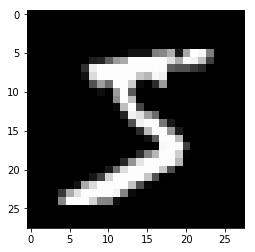

In [32]:
plt.imshow(img.view((28,28)))


### Initial python model
- weights receives random values 784 in and 10 out
- bias initialized with zeros

In [33]:
weights=torch.randn(784,10);

In [34]:
bias=torch.zeros(10);bias

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Matrix multiplication pseudocode
- function of matrix multiplication
- review of matrix multiplication from matrixmultiplication.xyz
    - A few loops going on: three
- def matmul
- ar and ac receive shape of matrix a
- br and bc receives shape of matrix be
-  assert the shapes of ac and br are the same
- c receives zeros with shape ar and br
- for i in range ar
    - for j in range
        - for k in range(ac):
            - c(i,j)...

- m1 receives x_validation
- m2 receives weights
- time the usage of matrix multiplication
    - result 800ms

In [35]:
def matmul(a,b):
    ar,ac=a.shape #nrows * ncols
    br,bc=b.shape
    assert ac==br
    c=torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j]+=a[i,k]*b[k,j]
    return c

In [36]:
m1=x_valid[:5]
m2=weights

In [37]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [38]:
%time t1=matmul(m1,m2)

CPU times: user 978 ms, sys: 5.3 ms, total: 983 ms
Wall time: 991 ms


- **the multiplication is quite slow. Let's try to speed it up**
    - Every layer would take about 10 hours
    - That's why we don't write things on pure python
    - Let's try to speed this up
    - Let's pass the backend to pytorch

#### Elementwise operations
- a receives a tensor
- b receives another nesor
- sum both tensors
- a less tham b conveted to a float and get their mean
- m receives a tensor matrix
- **calculate frobenius norm**
- trying to translate equations into code
- sum is two for loops, one in i and other in j
- square of the sum of all the terms
- Howard dont write latex :)
    - He copy and paste from google wikipedia
- m times m sum and sware root

In [39]:
a=tensor([10., 5, -4])
b=tensor([2., 8, 7])
a,b

(tensor([10.,  5., -4.]), tensor([2., 8., 7.]))

In [40]:
a+b

tensor([12., 13.,  3.])

In [41]:
(a<b).float().mean()

tensor(0.6667)

In [42]:
m=tensor([[1.,2,3],[4,5,6],[7,8,9]]);m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Frobenius norm:
$$||A||_F = (\sum_{i,j=1}^{n}|a_{i,j}|^2)^{1/2}$$

In [43]:
# The previous equation is replicated with this code
(m*m).sum().sqrt()

tensor(16.8819)

#### Elementwise matmul
- replace third loop with frobenius norm
- c = a_i + b_j . sum
- time is 700 faster
- backend in C
- let's check if it is right
- define function near(a,b) using torch. allclose()
- test_near receives test(near)

In [44]:
def matmul(a,b):
    ar,ac=a.shape #nrows * ncols
    br,bc=b.shape
    assert ac==br
    c=torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j]=(a[i,:]*b[:,j]).sum() # Using Frobenius norm
    return c

In [45]:
%timeit -n 10 _=matmul(m1,m2)

1.61 ms ± 176 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
f'{941/1.54:.2f} times faster'

'611.04 times faster'

In [47]:
#export
def near(a,b):
    return torch.allclose(a,b,rtol=1e-3,atol=1e-5)

def test_near(a,b):
    test(a,b,near)

In [48]:
test_near(t1,matmul(m1,m2))

- Now, let's get rid of one more loop

#### Broadcasting
- run at cuda
- remove loops
- describes how arrays with differents shapes are treated during arithmetic operations
- first used in numpy
- is like a new programming language
- a > 0 comparing tensor with value, it works because of 0 is being broadcast to have same dimension as a
- a+1 also broadcast 1 to the tensor a
- 2*m broadcasts 2 to tm

- **broadcast with a scalar**

In [49]:
a

tensor([10.,  5., -4.])

In [50]:
a>0

tensor([1, 1, 0], dtype=torch.uint8)

How are we able to do a>0? 0 is bein broadcast to have the same dimensions as a

In [51]:
a+1

tensor([11.,  6., -3.])

In [52]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

### Broadcasting a vector to a matrix
- c receives a tensor
- m and c have different shapes (3x3) and (3x1)
- array is broadcasted to
- theres no loop but it looks like as there was a loop
- c.expand_as(m)
- version of c as a broadcast tensor rank 2 instead of array
- c speed with no looop
- t.storashe show sthat thers onl 3 values bein stored
- b.stride()
- tensor behave like higher rank things

what if we want to take a column instead fo a row?
- c.unsqueeze(0j=) is a shape one comma 3
- c.unsqueeze 1 is a shape three coma one
- this is interesting because
- c none columns is is same shape 1 and c : none is same of squeeze 1
- c[:, None].expand as m broadcast as columns

In [53]:
c = tensor([10.,20,30]);c

tensor([10., 20., 30.])

In [54]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [55]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [56]:
m+c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [57]:
c+m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

We don't really copy the rows, but it looks as if we did. In fcat, the rows are given a stride of 0.

In [58]:
t = c.expand_as(m);t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

_**Review of Rank (personal notes):** The rank of a matrix A is the dimension of the vector space generated by its columns. Corresponde to the maximal number of linearly independent columns of A. For example:_

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf2b250d0de299673e8a5538de6e7a9eeb74e42" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -4.005ex; width:15.601ex; height:9.176ex;" alt="{\displaystyle {\begin{bmatrix}1&amp;0&amp;1\\-2&amp;-3&amp;1\\3&amp;3&amp;0\end{bmatrix}}}">

_has rank 2: the first two columns are linearly independent, so the rank is at least 2, but since the third is a linear combination of the first two (the second subtracted from the first (the second subtracted from the first), the three columns are linearly dependent so the rank must be less than 3._

_The matrix_

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/fa97694618119aeec3bc66382bc7219d052beaff" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.505ex; width:25.09ex; height:6.176ex;" alt="A=\begin{bmatrix}1&amp;1&amp;0&amp;2\\-1&amp;-1&amp;0&amp;-2\end{bmatrix}">

_has rank 1: there are nonzero columns, so the rank is positive, but any pair of colums is linearly dependent. Also $A^T$ has always the same rank_

In [59]:
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [60]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [61]:
c, c.unsqueeze(0)

(tensor([10., 20., 30.]), tensor([[10., 20., 30.]]))

In [62]:
c.unsqueeze(1)

tensor([[10.],
        [20.],
        [30.]])

In [63]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [64]:
c.shape, c.unsqueeze(0).shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

- Instead of using unqueeze, we can use None

In [65]:
c, c[None, :], c[:, None]

(tensor([10., 20., 30.]), tensor([[10., 20., 30.]]), tensor([[10.],
         [20.],
         [30.]]))

In [66]:
c.shape, c[None, :].shape, c[:, None].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [67]:
c[:, None, None, None].shape

torch.Size([3, 1, 1, 1])

In [68]:
c[None].shape, c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [69]:
c[...,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [70]:
c[None].expand_as(m)

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [71]:
m+c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

### Broadcasting in Excel
- semicol and none is column and note afer is row

### Eliminating loops with broadcasting
- The entire row of c[i] (which is c i : (you can eliminate the semicolomns)
- ci receives row i of a. unsqueeze (-1) which is the last dimension
- you can also write a, i None instad of -1
- rank 2 tensor and b is also a rank 2 tensor. unsqueeze to broadcast into b and then sum them over the rows (dim 0)
- **Homework:** Why this works??


- 3200 faster now with broadcasting
- getting rid of looops also reduces errors

In [72]:
def matmul(a,b):
    ar,ac=a.shape #nrows * ncols
    br,bc=b.shape
    assert ac==br
    c=torch.zeros(ar,bc)
    for i in range(ar):
    #    for j in range(bc):
    #        c[i,j]=(a[i,:]*b[:,j]).sum()
        c[i,:] = (a[i].unsqueeze(-1)*b).sum(dim=0)
        #c[i]=(a[i,None]*b).sum(dim=0)
    return c

In [73]:
%timeit -n 10 _=matmul(m1,m2)

400 µs ± 129 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [74]:
test_near(t1, matmul(m1,m2))

In [75]:
f'{1630/274:.2f} faster than previous'

'5.95 faster than previous'

#### Homework 
- [x] **HOMEWORK:** Convince yourself on why `c[i,:] = (a[i].unsqueeze(-1)*b).sum(dim=0)` works

##### Solution

In [76]:
# Taking two matrices from matrixmultplication.xyz
a = tensor([[1.,2,1],[0,1,0],[2,3,4]]);print(a)
b = tensor([[2.,5],[6,7],[1,8]]);b

tensor([[1., 2., 1.],
        [0., 1., 0.],
        [2., 3., 4.]])


tensor([[2., 5.],
        [6., 7.],
        [1., 8.]])

In [77]:
# Let's demonstrate manually the matmul function
ar,ac=a.shape #nrows * ncols
br,bc=b.shape
c=torch.zeros(ar,bc)
list(range(ar))

[0, 1, 2]

In [78]:
ar, ac, br, bc

(3, 3, 3, 2)

In [79]:
# Let's first manually iterate
i = 0

In [80]:
# Lets debug (a[i].unsqueeze(-1)*b).sum(dim=0)
a[i]

tensor([1., 2., 1.])

In [81]:
a[i].unsqueeze(-1)

tensor([[1.],
        [2.],
        [1.]])

In [82]:
b

tensor([[2., 5.],
        [6., 7.],
        [1., 8.]])

In [83]:
a[i].unsqueeze(-1)*b

tensor([[ 2.,  5.],
        [12., 14.],
        [ 1.,  8.]])

In [84]:
(a[i].unsqueeze(-1)*b).sum()

tensor(42.)

In [85]:
(a[i].unsqueeze(-1)*b).sum(dim=0)

tensor([15., 27.])

In [86]:
(a[i].unsqueeze(-1)*b).sum(dim=1)

tensor([ 7., 26.,  9.])

In [87]:
# Let's add one more iteration
i=1
(a[i].unsqueeze(-1)*b).sum(dim=0)

tensor([6., 7.])

In [88]:
# Expected answer
matmul(a,b)

tensor([[15., 27.],
        [ 6.,  7.],
        [26., 63.]])

### Broadcasting rules
- c[None, :] is row based
- shape 1 by 3
- eleentwise multiplication
- c times c[:, none] value by value matrix
- broadcast into squared
- they dont have to be in the same rank
- you can normalize by channel with no limnes of code
- **Class Break**
  - Goal make code faster
  - how to do our own stuff
  - how to write codes fast
  - broadcast trick is one of the best for making loops fater.

In [89]:
c = tensor([10.,20,30])
c[None,:]

tensor([[10., 20., 30.]])

In [90]:
c[None,:].shape

torch.Size([1, 3])

In [91]:
c[:,None].shape

torch.Size([3, 1])

In [92]:
c[None,:]*c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [93]:
c[None,:]

tensor([[10., 20., 30.]])

In [94]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [95]:
c[None]

tensor([[10., 20., 30.]])

In [96]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [97]:
c[None]>c[:,None]

tensor([[0, 1, 1],
        [0, 0, 1],
        [0, 0, 0]], dtype=torch.uint8)

In [98]:
c[None].expand_as(m)

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [99]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

When operating on two arrays/tensors, Numpy/PyTroch compares their shapes element-wise. It satarts with the trailing dimensions, and works its way foward. Two dimensions are compatible when
- They are equal, or
- One of them is 1, in whic case that dimension is broadcasted to make it the same size

Arrays do not need to have the same number of dimensions. For example, if you have a $256*256*3$ array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. 

### Einstein summation
- Popularized by einsteing for higher rank matrix
- Compact representation for combining products and sums in a general way
- if pytorch didnt have batchwise multiplication, noe new index oadded would transform it
- c i j + a i k times b , j
- a i k k j -> i j
    - using index inside string for notation and matrix
- def matmul(a,b) return torch.einsum('ik,kj->ij', a, b)
- now it is 16 times faster using einstein sum
- tragedy that it exists
- a programming language using string
- amazing but so few things it does
- I want to generalize to a language
- hope is that swift give ability to write stuffs that really fast
- swift is even faster than einsum

In [100]:
# 1
def matmul(a,b):
    ar,ac=a.shape #nrows * ncols
    br,bc=b.shape
    assert ac==br
    c=torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j]+=a[i,k]*b[k,j] # <-- Get this portion
    return c

In [101]:
# 2
# c[i,j]+=a[i,k]*b[k,j]

In [102]:
# 3
# [i,j]+=[i,k]*[k,j]

In [103]:
# 4
# [i,k]*[k,j]->[i,j]

In [104]:
# 5
# ik,kj->ij

In [105]:
def matmul(a,b):
    return torch.einsum('ik,kj->ij', a, b)

In [106]:
%timeit -n 10 _=matmul(m1,m2)

The slowest run took 33.90 times longer than the fastest. This could mean that an intermediate result is being cached.
277 µs ± 555 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [107]:
f'{274/67:.2f} faster than previous'

'4.09 faster than previous'

In [108]:
f'{990e3/67:.2f} faster than first attempt'

'14776.12 faster than first attempt'

### Pytorch operator
- use pytorchs function or operator directly for matrix multiplication
- 50 thousand faster
- m1.matmul
- divide into batches, written into assemb, blal, library of linear algebra, for example cuBlAS
- awfaw, bc program is limited to a subset of thinks that BLAS can write read
- limited to python methods
- people working on this on swift
- facebook research and tensor compresions
- in python we are restricted to m1.matmul
- pure ehanced way with einsum is 10 thousand slower
- need of libraries
- t2 = m1@m2

In [109]:
%timeit -n 10 t2 = m1.matmul(m2)

The slowest run took 21.79 times longer than the fastest. This could mean that an intermediate result is being cached.
26.9 µs ± 49.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [110]:
print(f'{67/17.9:.2f} faster than previous')
print(f'{990e3/17:.2f} faster than first attempt')

3.74 faster than previous
58235.29 faster than first attempt


In [111]:
t2=m1@m2

In [112]:
test_near(t1,t2)

We'll be using as default for matrix multiplication

## [1:23:00](https://youtu.be/4u8FxNEDUeg?t=5002) Notebook 02 Fully Connected Layers (file [02_fully_connected.ipynb](https://github.com/fastai/fastai_docs/blob/master/dev_course/dl2/02_fully_connected.ipynb))


### The foward and backward passes
- x train, y train, x y get data
- get standard deviation
- normalize using standard deviation
- note use training, not validation mean for normalizing validation set
- afer doing that mean is close to zero and std close to 1
- test function if it is really normalized
- n,m get xtrain shape
- c output size

In [113]:
ls exp

__pycache__/ nb_00.py     nb_01.py     nb_02.py


In [114]:
!python notebook2script.py lesson-8-jupyter.ipynb

Converted lesson-8-jupyter.ipynb to nb_lesson-8-jupyter.py


In [115]:
!mv exp/nb_lesson-8-jupyter.py exp/nb_01.py

In [116]:
from exp.nb_01 import *

In [117]:
#export
def get_data():
    path = datasets.download_data(MNIST_URL, ext='.gz')
    with gzip.open(path, 'rb') as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
    return map(tensor, (x_train, y_train, x_valid, y_valid))

def normalize(x,m,s):
    return (x-m)/s

In [118]:
x_train, y_train, x_valid, y_valid = get_data()

In [119]:
train_mean, train_std=x_train.mean(), x_train.std()
train_mean, train_std

(tensor(0.1304), tensor(0.3073))

In [120]:
x_train = normalize(x_train, train_mean, train_std)
#NB: Use training mean, not validation mean for val set
# -Because the two datasets would be in different scales
x_valid = normalize(x_valid, train_mean, train_std)

In [121]:
train_mean, train_std = x_train.mean(), x_train.std()
train_mean, train_std

(tensor(0.0001), tensor(1.))

In [122]:
#export
def test_near_zero(a, tol=1e-3):
    assert a.abs()<tol, f'Near zero:{a}'

In [123]:
test_near_zero(x_train.mean())
test_near_zero(1-x_train.std())

In [124]:
n,m = x_train.shape
c = y_train.max()+1
n,m,c

(50000, 784, tensor(10))

## Foundations version
### Basic architecture

- Model has one hidden layer
- Foundations version
- basic architecture
- number of hidden layers  nhis 50
- two layers is two wegiths and biases matrices
- w1 is random values divided by sqare root of m
- b are zeros
- w2 is random values (nh,1) divided by math sqarue of nh
- t is linear of three vectors
- divide by sqare root m then tensor has lower values
- simplified kaiming initialization, wrote a paper about it
- test mean and standard of weight 1
- thing that really matters when training


In [125]:
# num hidden
nh=50

In [126]:
# simplified kaiming init / he init
w1 = torch.randn(m,nh)/math.sqrt(m) #m is 28*28, input size
b1 = torch.zeros(nh)
w2 = torch.randn(nh,1)/math.sqrt(nh)
b2 = torch.zeros(1) # To simplify we'll have one output for MSE

In [127]:
w2.shape

torch.Size([50, 1])

In [128]:
test_near_zero(w1.mean())
test_near_zero(w1.std()-1/math.sqrt(m))

In [129]:
# Should be near 1 and 1
x_valid.mean(), x_valid.std()

(tensor(-0.0057), tensor(0.9924))

In [130]:
def lin(x, w, b):
    return x@w+b

In [131]:
t = lin(x_valid, w1, b1)

In [132]:
#... so should this, because we used kaimin init, which is designed to do this
t.mean(), t.std()

(tensor(-0.0282), tensor(1.0168))

By using the previous initialization, the linear initialization also propagates a mean near zero and a std near one


- **[1] Fixup initialization:** https://arxiv.org/abs/1901.09321
    - paper with 10000 layers just with careful initialization
- how initialization is made really matters
- spend a lot of time on this in depth
- first layer is defined by relu
- relu is grag data and clamp min to z (replace negative to zero)
- try to find the function internal on pytorch

- unfortunatelly does not have mean zero and std of 1

In [133]:
def relu(x):
    return x.clamp_min(0.)

In [134]:
t=relu(lin(x_valid, w1, b1))

In [135]:
#Unforunatelly doest not have zero mean and std of 1
t.mean(), t.std()

(tensor(0.3855), tensor(0.5797))

From pytorch docs, `a: the negative slope of the rectifier used after this layer (0 for ReLU by default)`

$$std = \sqrt{2/{(1+a^2)*\text{fan_in}}}$$


- demonstration
    - distribution of data
    - then took evertyhing smaller and took out
    - obviously mean and std are gong to differ
![Screen Shot 2019-03-19 at 11 29 08](https://user-images.githubusercontent.com/5733246/54631965-46545000-4a3a-11e9-82bc-c27e7c59dff8.png)



- **[2] Surpassing human level performance on imagenet classification**: https://arxiv.org/abs/1502.01852
    - > one of the most extraordinary papers in the last few years
    - full of great ideas
    - From resnet winners
    - read papers from competition winners if a great idea
    - where competition ideas has 20 good ideas
    - kine initialization
    - Section 2.2 initialization of filter weights for rectifiers
    - are easier to train cbut a bat initializatiom still hamper the learning of a non linear system
    - initializet with random gaussian distributions
    - glorot and benchi proposded a new initialization
        - Does not account for relu
    
- **[3] (glorot) Understanding the difficulty of training deep feedforward neural networks**: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
    - Very readable and practical
    - well be reimplementing stuffs from the paper
    - Final result solution is simple
    - **One suggestion is another approach called normalized initialization**
        - Based on the square root

- [2](https://arxiv.org/abs/1502.01852) pointed out that the initializatoin does not account for relu
    - super simple solution is to replace the one in the top to a two in the top of the initializaton
    - $$std = sqrt(2/((1+a^2) * fan_in))$$
    - closer to std 1 and mean zero

In [136]:
# kaiming init/he init for relu
w1 = torch.randn(m,nh)*math.sqrt(2/m)

In [137]:
w1.mean(), w1.std()

(tensor(-0.0005), tensor(0.0503))

In [138]:
t = relu(lin(x_valid, w1, b1))
t.mean(), t.std()

(tensor(0.5397), tensor(0.8270))

Much closer to our goal (although not perfect)

- **[ ]!!HOMEWORK: Read 2.2 of [2](https://arxiv.org/abs/1502.01852)**

#### Foward propagation layer

take it throuh step by step.
6 paragraphs to read
!! read section foward
> "this leads to a zero-mean gaussian distribution whose standar deviation"

- something new and obvious is to replace relu to x.clamp_min(0)-0.5 which will return to the correct mean

he had to add a mode callsed fan out
- fan ipreserves the magnitudes in the output pass
    - Dividing by the fifrst or second
- we need it because the weights shape is 784 by 50 while a linear torch is 50 by 784
- look into source code to undertand using double question mark
- it calls F.linear (F.nn.functional)
- letds look
- a linear layer with their transposed
- thats why we gave the oposite when compared to torch code


In [139]:
#export
from torch.nn import init

In [140]:
w1 = torch.zeros(m,nh)
init.kaiming_normal_(w1, mode='fan_out') #kinda have to give the opposite information because in pytorch it was transposed
t = relu(lin(x_valid, w1, b1))

In [141]:
#init.kaiming_normal_??

In [142]:
w1.mean(), w1.std()

(tensor(0.0002), tensor(0.0506))

In [143]:
t.mean(), t.std()

(tensor(0.6297), tensor(0.8830))

In [144]:
w1.shape

torch.Size([784, 50])

In [145]:
import torch.nn

In [146]:
torch.nn.Linear(m,nh).weight.shape

torch.Size([50, 784])

In [147]:
# wat if..??
def relu(x):
    return x.clamp_min(0)-0.5
# Might return to the expected mean

- what about conv layers??
    - check documentation
    - mostly documentation
    - mostly code is under $_ConvND$_
    - at the very bottong theres the file conv
    - it has a special multiplier math.sqrt(5)
        - seem to work pretty badly
        - always a good idea to add comment
- feeling that this is not great
- we desined our own activation function
    - of relu minus 0.5
- using it the mean is almost zero and variance is almost one
- make sense why this makes better results


In [148]:
w1 = torch.randn(m,nh)*math.sqrt(2./m)
t1 = relu(lin(x_valid, w1, b1))
t1.mean(), t1.std()

(tensor(-0.0028), tensor(0.7605))

In [149]:
def model(xb):
    l1 = lin(xb, w1, b1) # one linear layer
    l2 = relu(l1) # relu
    l3 = lin(l2, w2, b2) # other linear layer
    return l3

In [150]:
%timeit -n 10 _=model(x_valid)

20.1 ms ± 896 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Loss function: MSE
- simplify things using mean square error
- expect a single vector
- use squeze to get rid in output.squeeze()
- very common broke code because squeeze into a scaler
better to put dimension in squeeze (-1) for example
y train, y validation get floats

get the mean squared error

In [151]:
model(x_valid).shape

torch.Size([10000, 1])

We need squeeze() to get rid of that trailing (,1) in order to use mse. (of course, mse is not suitable for multiclassification, well use better loss function soon. We'll use mse for now to keep things simple)

In [152]:
def mse(output, targ):
    return (output.squeeze(-1)-targ).pow(2).mean() #better to say which dimmension to squeeze

In [153]:
#test
model(x_valid).squeeze().pow(2).mean()

tensor(0.4207)

In [154]:
y_train, y_valid = y_train.float(), y_valid.float()

In [155]:
preds = model(x_train)

In [156]:
preds.shape

torch.Size([50000, 1])

In [157]:
mse(preds, y_train)

tensor(28.6899)

## [1:48:00](https://youtu.be/4u8FxNEDUeg?t=6484) 

### Gradients and backward pass
- paper the matrix calculus you need for deep learning html by jeremy howard and terence parr: https://explained.ai/matrix-calculus/index.html

- > all you need to know is the chain rule

- start with an input, then a linear layer then a relu then second linear layer, then mse then y pred

- other way is
- y_pred = mse(lin2(relu(lin1(x))),y)
![Screen Shot 2019-03-23 at 18.12.47.png](https://udacity-reviews-uploads.s3.us-west-2.amazonaws.com/_attachments/38140/1553390082/Screen_Shot_2019-03-23_at_18.12.47.png)

![Screen Shot 2019-03-23 at 18.13.47.png](https://udacity-reviews-uploads.s3.us-west-2.amazonaws.com/_attachments/38140/1553390083/Screen_Shot_2019-03-23_at_18.13.47.png)

- we want the gradient of the ouput y with the respect of the input x
- y equals to f(u)
- u equals to f(x)
- derivatie dy/dx is dy/dy times du/dx
- thats all you need to know
- usually it is not treated as division, but you actually you can
- dividing small change in y by small change in x
- start with mean squared error
    - gradient of the loss with respect to outputprevious layer
    - it is two times error
    
- def mse_grad(input, target)
- the input of mse is the output of previous layer
- def gradient of relu
- either zero or 1 which is inp > 0 dot float times out.g

- linear gradient defined
- def foward and backward
- in backward pass
- mse_grad
- lin_grad
- relu_grad
- value inp.g is updated in each function
- loss is the mse we never use it
- the loss never appears in the gradients
- so w1.g w2.g ans so on contain the gradients
- let's clone weights and biases and test them


In [158]:
def mse_grad(inp, targ):
    # grad of loss with respect to output
    inp.g = 2. * (inp.squeeze() - targ).unsqueeze(-1) / inp.shape[0]

In [159]:
def relu_grad(inp, out):
    # Grad of Relu with respect to input activation
    inp.g = (inp>0).float() * out.g

In [160]:
def lin_grad(inp, out, w, b):
    # grad of matmul with respect to input
    inp.g = out.g @ w.t()
    w.g = (inp.unsqueeze(-1) * out.g.unsqueeze(1)).sum(0)
    b.g = out.g.sum(0)

In [161]:
def foward_and_backward(inp, targ):
    # foward pass:
    l1 = inp@w1+b1
    l2 = relu(l1)
    out = l2@w2+b2
    # we don't need the loss in backward
    loss = mse(out,targ)
    
    #backward pass
    mse_grad(out,targ)
    lin_grad(l2, out, w2, b2)
    relu_grad(l1, l2)
    lin_grad(inp, l1, w1, b1)

In [162]:
inp = x_train
targ = y_train

In [163]:
l1 = inp @ w1 + b1
l2 = relu(l1)
out = l2 @ w2 + b2
# we don't actually need the loss in backward!
loss = mse(out, targ)

In [164]:
mse_grad(out,targ)

In [165]:
lin_grad(l2, out, w2, b2)

In [166]:
relu_grad(l1, l2)

In [167]:
out=l1
w=w1
b=b1


In [168]:
# grad of matmul with respect to input
inp.g = out.g @ w.t()

In [ ]:
#w.g = (inp.unsqueeze(-1) * out.g.unsqueeze(1)).sum(0)

In [169]:
inp.unsqueeze(-1)

tensor([[[-0.4244],
         [-0.4244],
         [-0.4244],
         ...,
         [-0.4244],
         [-0.4244],
         [-0.4244]],

        [[-0.4244],
         [-0.4244],
         [-0.4244],
         ...,
         [-0.4244],
         [-0.4244],
         [-0.4244]],

        [[-0.4244],
         [-0.4244],
         [-0.4244],
         ...,
         [-0.4244],
         [-0.4244],
         [-0.4244]],

        ...,

        [[-0.4244],
         [-0.4244],
         [-0.4244],
         ...,
         [-0.4244],
         [-0.4244],
         [-0.4244]],

        [[-0.4244],
         [-0.4244],
         [-0.4244],
         ...,
         [-0.4244],
         [-0.4244],
         [-0.4244]],

        [[-0.4244],
         [-0.4244],
         [-0.4244],
         ...,
         [-0.4244],
         [-0.4244],
         [-0.4244]]])

In [170]:
out.g.unsqueeze(1)

tensor([[[-1.2450e-06, -9.5150e-06,  2.3526e-05,  ..., -1.0233e-05,
           0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00, -1.7675e-06,  ...,  0.0000e+00,
          -1.3278e-06, -0.0000e+00]],

        [[-1.0193e-06, -0.0000e+00,  0.0000e+00,  ..., -8.3778e-06,
           0.0000e+00,  1.4117e-05]],

        ...,

        [[-0.0000e+00, -0.0000e+00,  0.0000e+00,  ..., -1.7985e-05,
           0.0000e+00,  3.0304e-05]],

        [[-0.0000e+00, -0.0000e+00,  0.0000e+00,  ..., -0.0000e+00,
           0.0000e+00,  0.0000e+00]],

        [[-2.3229e-06, -0.0000e+00,  0.0000e+00,  ..., -1.9093e-05,
           0.0000e+00,  0.0000e+00]]])

In [172]:
resp = (inp.unsqueeze(-1) @ out.g.unsqueeze(1))

In [ ]:
resp.sum(0)

In [ ]:
b.g = out.g.sum(0)

In [178]:
torch.backends.cudnn.enabled=False

In [183]:
lin_grad(x_train, l1, w1, b1)

AttributeError: 'Tensor' object has no attribute 'g'

In [179]:
foward_and_backward(x_train, y_train)

KeyboardInterrupt: 

In [219]:
mse_grad(out,targ)

In [221]:
# Save for testing against later
w1g = w1.g.clone()
w2g = w2.g.clone()
b1g = b1.g.clone()
b2g = b2.g.clone()
ig = x_train.g.clone()

AttributeError: 'Tensor' object has no attribute 'g'

- we cheat a little bit and use pytorch autograd required grad to check our results
- using test near to check if results are correct

In [212]:
xt2 = x_train.clone().requires_grad_(True)
w12 = w1.clone().requires_grad_(True)
w22 = w2.clone().requires_grad_(True)
b12 = b1.clone().requires_grad_(True)
b22 = b2.clone().requires_grad_(True)


### Layers as classes
Refactory
- recreating pytorch api

class Relu()
    def __call__ # treat relu as a function and call whats inside
    safe input and outpu
    def backpro self.inp.g = self.float.self.out


for linear compute self.w.g in backward

** backward always compute .g**

Class model


init has w1, b1, w2, b2

def call with x and target

def backwar with self.loss.backward() to save loss.g

w1.g, b1.g w2.g
model =

However, that was slow!!


In [362]:
class Relu():
    def __call__(self, inp):
        self.inp = inp
        self.out = inp.clamp_min(0)-0.5
        return self.out
    
    def backward(self):
        self.inp.g = (self.inp>0).float() * self.out.g

In [380]:
class Lin():
    def __init__(self, w, b):
        self.w, self.b = w,b
        
    def __call__(self, inp):
        self.inp = inp
        self.out = inp@self.w + self.b
        return self.out
    
    def backward(self):
        self.inp.g = self.out.g @ self.w.t()
        # Creating a giant outer product, just to sum it, is inneficiet
        self.w.g = (self.inp.unsqueeze(-1)*self.out.g.unsqueeze(1)).sum(0)

In [381]:
class Mse():
    def __call__(self, inp, targ):
        self.inp = inp
        self.targ = targ
        self.out = (inp.squeeze() - targ).pow(2).mean()
        return self.out
    
    def backward(self):
        self.inp.g = 2. * (self.inp.squeeze() - self.targ).unsqueeze(-1) / self.targ.shape[0]

In [387]:
class Mse():
    def __call__(self, inp, targ):
        self.inp = inp
        self.targ = targ
        self.out = (inp.squeeze() - targ).pow(2).mean()
        return self.out
    
    def backward(self):
        self.inp.g = 2. * (self.inp.squeeze() - self.targ).unsqueeze(-1) / self.targ.shape[0]

In [388]:
class Model():
    def __init__(self, w1, b1, w2, b2):
        self.layers = [Lin(w1,b1), Relu(), Lin(w2, b2)]
        self.loss = Mse()
        
    def __call__(self, x, targ):
        for l in self.layers: x=l(x)
            
    def backward(self):
        self.loss.backward()
        for l in reversed(self.layers):
            l.backward()

In [389]:
w1.g, b1.g, w2.g, b2.g = [None]*4

In [390]:
model = Model(w1, b1, w2, b2)

In [391]:
%time loss=model(x_train, y_train)

CPU times: user 244 ms, sys: 454 ms, total: 698 ms
Wall time: 537 ms


In [392]:
%time model.backward()

AttributeError: 'Mse' object has no attribute 'inp'

### Module foward

create a new def in module callde forward which initially raise not implemented

class Relu(module)
it used foward

the thing to calculate the gradient with the respect to the weights, we can reexpress that with einsum
now it is faster with einsum

time it now is 143ms intesad of 3s

> This is why we have to use those modules

In [393]:
class Module():
    def __call__(self, *args):
        self.args = args
        self.out = self.forward(*args)
        return self.out
    
    def forward(self): raise Exception('not implemented')
    def backward(self): self.bwd(self.out, *self.args)

In [394]:

class Relu(Module):
    def forward(self, inp): return inp.clamp_min(0.)-0.5
    def bwd(self, out, inp): inp.g = (inp>0).float() * out.g

In [395]:
class Lin(Module):
    def __init__(self, w, b): self.w,self.b = w,b
        
    def forward(self, inp): return inp@self.w + self.b
    
    def bwd(self, out, inp):
        inp.g = out.g @ self.w.t()
        self.w.g = torch.einsum("bi,bj->ij", inp, out.g)
        self.b.g = out.g.sum(0)

In [396]:
class Mse(Module):
    def forward (self, inp, targ): return (inp.squeeze() - targ).pow(2).mean()
    def bwd(self, out, inp, targ): inp.g = 2*(inp.squeeze()-targ).unsqueeze(-1) / targ.shape[0]

In [397]:
class Model():
    def __init__(self):
        self.layers = [Lin(w1,b1), Relu(), Lin(w2,b2)]
        self.loss = Mse()
        
    def __call__(self, x, targ):
        for l in self.layers: x = l(x)
        return self.loss(x, targ)
    
    def backward(self):
        self.loss.backward()
        for l in reversed(self.layers): l.backward()

In [398]:
w1.g,b1.g,w2.g,b2.g = [None]*4
model = Model()

In [399]:
%time loss = model(x_train, y_train)


CPU times: user 239 ms, sys: 453 ms, total: 692 ms
Wall time: 550 ms


In [400]:
%time model.backward()

CPU times: user 410 ms, sys: 115 ms, total: 524 ms
Wall time: 479 ms


In [410]:
test_near(w2g, w2.g)
test_near(b2g, b2.g)
test_near(w1g, w1.g)
test_near(b1g, b1.g)
test_near(ig, x_train.g)

AssertionError: near:
tensor([[  3.3106],
        [ -1.9763],
        [ -5.2552],
        [ -4.6224],
        [ -0.6235],
        [ -1.7669],
        [ -0.9728],
        [ -0.2975],
        [ -4.8763],
        [  2.7564],
        [  4.1308],
        [ -8.2567],
        [ -3.5082],
        [  3.6036],
        [ -2.5213],
        [  1.5783],
        [ -2.9128],
        [  3.2065],
        [  1.3771],
        [  1.2711],
        [ -3.4583],
        [ -6.6105],
        [  2.5902],
        [  1.4582],
        [  0.8516],
        [  2.0295],
        [ -0.0610],
        [-11.9325],
        [ -1.9607],
        [ -0.4036],
        [  1.2859],
        [  3.4702],
        [  3.3210],
        [ -0.5364],
        [  2.0035],
        [-11.2006],
        [  2.2457],
        [ -0.1977],
        [ -5.7233],
        [  3.9284],
        [  1.4838],
        [  3.2441],
        [  2.8886],
        [ -2.9910],
        [ -1.8566],
        [ -1.8764],
        [  4.1975],
        [  3.3290],
        [ -1.1284],
        [ -1.5114]])
tensor([[  2.1326],
        [ -8.4081],
        [  3.2050],
        [ -1.0614],
        [ -3.9283],
        [  2.3468],
        [ -1.9779],
        [  3.1268],
        [-10.3044],
        [  0.0327],
        [  2.4487],
        [  3.2933],
        [ -5.2013],
        [  1.8300],
        [ -5.0611],
        [ -7.1394],
        [  2.6343],
        [ -0.9606],
        [  3.2798],
        [  3.5225],
        [  1.9575],
        [ -3.8827],
        [ -7.8621],
        [  0.1428],
        [-11.2387],
        [  1.1391],
        [  1.2058],
        [ -0.1460],
        [-11.7274],
        [ -0.2920],
        [ -7.2868],
        [  0.0262],
        [  1.3072],
        [ -7.8358],
        [  2.6910],
        [  0.5357],
        [ -9.5467],
        [ -2.0982],
        [  3.3718],
        [ -1.2137],
        [  3.9854],
        [ -1.3049],
        [  2.9785],
        [ -0.3443],
        [  2.0311],
        [ -2.4654],
        [ -0.8550],
        [ -3.0190],
        [  0.9579],
        [ -7.1768]])

#### Without einsum

repplace with matrix multiplication
140ms

implemented nn.linear

In [404]:
class Lin(Module):
    def __init__(self, w, b): self.w,self.b = w,b
        
    def forward(self, inp): return inp@self.w + self.b
    
    def bwd(self, out, inp):
        inp.g = out.g @ self.w.t()
        self.w.g = inp.t() @ out.g
        self.b.g = out.g.sum(0)

In [405]:
w1.g,b1.g,w2.g,b2.g = [None]*4
model = Model()

In [406]:
%time loss = model(x_train, y_train)


CPU times: user 214 ms, sys: 407 ms, total: 620 ms
Wall time: 444 ms


In [407]:
%time model.backward()


CPU times: user 504 ms, sys: 266 ms, total: 769 ms
Wall time: 664 ms


In [408]:
test_near(w2g, w2.g)
test_near(b2g, b2.g)
test_near(w1g, w1.g)
test_near(b1g, b1.g)
test_near(ig, x_train.g)

AssertionError: near:
tensor([[  3.3106],
        [ -1.9763],
        [ -5.2552],
        [ -4.6224],
        [ -0.6235],
        [ -1.7669],
        [ -0.9728],
        [ -0.2975],
        [ -4.8763],
        [  2.7564],
        [  4.1308],
        [ -8.2567],
        [ -3.5082],
        [  3.6036],
        [ -2.5213],
        [  1.5783],
        [ -2.9128],
        [  3.2065],
        [  1.3771],
        [  1.2711],
        [ -3.4583],
        [ -6.6105],
        [  2.5902],
        [  1.4582],
        [  0.8516],
        [  2.0295],
        [ -0.0610],
        [-11.9325],
        [ -1.9607],
        [ -0.4036],
        [  1.2859],
        [  3.4702],
        [  3.3210],
        [ -0.5364],
        [  2.0035],
        [-11.2006],
        [  2.2457],
        [ -0.1977],
        [ -5.7233],
        [  3.9284],
        [  1.4838],
        [  3.2441],
        [  2.8886],
        [ -2.9910],
        [ -1.8566],
        [ -1.8764],
        [  4.1975],
        [  3.3290],
        [ -1.1284],
        [ -1.5114]])
tensor([[  2.1326],
        [ -8.4081],
        [  3.2050],
        [ -1.0614],
        [ -3.9283],
        [  2.3468],
        [ -1.9779],
        [  3.1268],
        [-10.3044],
        [  0.0327],
        [  2.4487],
        [  3.2933],
        [ -5.2013],
        [  1.8300],
        [ -5.0611],
        [ -7.1394],
        [  2.6343],
        [ -0.9606],
        [  3.2798],
        [  3.5225],
        [  1.9575],
        [ -3.8827],
        [ -7.8621],
        [  0.1428],
        [-11.2387],
        [  1.1391],
        [  1.2058],
        [ -0.1460],
        [-11.7274],
        [ -0.2920],
        [ -7.2868],
        [  0.0262],
        [  1.3072],
        [ -7.8358],
        [  2.6910],
        [  0.5357],
        [ -9.5467],
        [ -2.0982],
        [  3.3718],
        [ -1.2137],
        [  3.9854],
        [ -1.3049],
        [  2.9785],
        [ -0.3443],
        [  2.0311],
        [ -2.4654],
        [ -0.8550],
        [ -3.0190],
        [  0.9579],
        [ -7.1768]])

#### nn linear and nn.module
even faster


In [411]:
#export
from torch import nn

In [412]:
class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.layers = [nn.Linear(n_in,nh), nn.ReLU(), nn.Linear(nh,n_out)]
        self.loss = mse
        
    def __call__(self, x, targ):
        for l in self.layers: x = l(x)
        return self.loss(x.squeeze(), targ)

In [413]:
model = Model(m, nh, 1)


In [414]:
%time loss = model(x_train, y_train)


CPU times: user 232 ms, sys: 405 ms, total: 637 ms
Wall time: 454 ms


In [415]:

%time loss.backward()

CPU times: user 198 ms, sys: 50.2 ms, total: 248 ms
Wall time: 164 ms


In [417]:
!python notebook2script.py lesson-8-jupyter.ipynb

Converted lesson-8-jupyter.ipynb to nb_lesson-8-jupyter.py


In [418]:
!mv exp/nb_lesson-8-jupyter.py exp/nb_02.py